In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

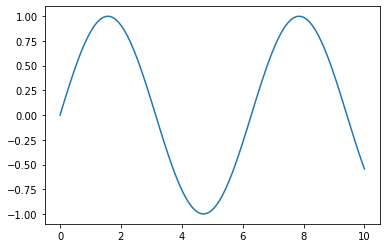

In [38]:
def plotFunc(func, interval):
    x = np.linspace(*interval, 100)
    y = func(x)
    plt.plot(x,y)

sigmoid = lambda x: 1/(1+np.exp(-0.1*x))
sin = lambda x: np.sin(x)
plotFunc(sin, (0, 10))

In [39]:
def genData(func, interval):
    x = np.linspace(*interval, 100, endpoint=False)
    y = func(x)
    return train_test_split(x, y, train_size = 0.7, random_state = 42)

In [40]:
x_train, x_test, y_train, y_test = genData(sin, (0, 10))

In [44]:
generalization_factor = 3
learning_rate = 0.25

quantization_intervals = 30
numWeights = 35
weights = np.ones((numWeights,1))
quant_split = np.linspace(0, 10,num = quantization_intervals + 1, endpoint=True)

association_vec = np.zeros((quantization_intervals, len(weights)))

error_vec = np.ones(y_train.shape)
avg_error_vec = []
epochs = []
iterations = 0
for i in range(len(association_vec)):
    association_vec[i][i:min(i+ numWeights - quantization_intervals+1, len(weights))] = 1

while np.linalg.norm(error_vec)/len(error_vec) > 1e-2:
    for i in range(len(x_train)):
        idx = int(np.floor(quantization_intervals*(x_train[i])/(10)))
        perc1 = round(1-(x_train[i] - quant_split[idx])*35/10, 2)
        active_weights = numWeights - quantization_intervals+1
        frac = []
        for j in range(active_weights):
            if j == 0:
                frac.append(perc1)
            elif j == active_weights - 1:
                frac.append(1-perc1)
            else:
                frac.append(1)
        op = 0
        for j in range(len(frac)):
            op += frac[j]*weights[min(j+idx, len(weights)-1)]
        error = y_train[i] - op
        error_vec[i] = error
        for j in range(len(frac)):
            weights[min(j+idx, len(weights)-1)] += frac[j]*learning_rate*error/(numWeights - quantization_intervals+1)
    print(np.linalg.norm(error_vec)/len(x_train))
    avg_error_vec.append(np.linalg.norm(error_vec)/len(x_train))
    iterations += 1

    epochs.append(iterations)
print("Training completed. Training Error = ", np.linalg.norm(error_vec)/len(x_train))
    

0.2897504340271656
0.04941525005232087
0.033705953580744616
0.027868243293651552
0.023965187276143097
0.021121824469059414
0.018941319431297943
0.017196004340438085
0.015752203160873206
0.01453022529073283
0.01348078078861494
0.01257151537014069
0.011779592976338737
0.011087702097481021
0.01048192832942091
0.009950620170500557
Training completed. Training Error =  0.009950620170500557


Text(0, 0.5, 'Training error')

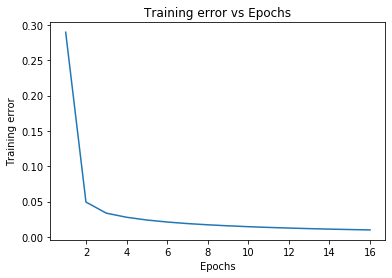

In [45]:
plt.plot(epochs, avg_error_vec)
plt.title('Training error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training error')

In [46]:
test_error_vec = np.zeros(y_test.shape)
for i in range(len(x_test)):
        idx = int(np.floor(quantization_intervals*(x_test[i])/(10)))
        perc1 = round(1-(x_test[i] - quant_split[idx])*35/10, 2)
        active_weights = numWeights - quantization_intervals+1
        frac = []
        for j in range(active_weights):
            if j == 0:
                frac.append(perc1)
            elif j == active_weights - 1:
                frac.append(1-perc1)
            else:
                frac.append(1)
        op = 0
        for j in range(len(frac)):
            op += frac[j]*weights[min(j+idx+1, len(weights)-1)]
        error = y_test[i] - op
        test_error_vec[i] = error
print(np.linalg.norm(test_error_vec)/len(y_test))

0.035658574065802646


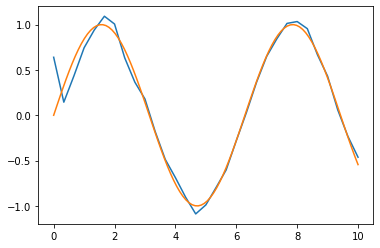

In [32]:
x_result = np.linspace(0, 10, quantization_intervals + 1, endpoint=True)
y_result = []
for i in range(len(x_result)):
        idx = int(np.floor(quantization_intervals*(x_result[i])/(10)))
        perc1 = round(1-(x_result[i] - quant_split[idx])*35/10, 2)
        active_weights = numWeights - quantization_intervals+1
        frac = []
        for j in range(active_weights):
            if j == 0:
                frac.append(perc1)
            elif j == active_weights - 1:
                frac.append(1-perc1)
            else:
                frac.append(1)
        op = 0
        for j in range(len(frac)):
            op += frac[j]*weights[min(j+idx+1, len(weights)-1)]
        y_result.append(op)

plt.plot(x_result, y_result)
plotFunc(sin, (0,10))